<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Angewandte Geophysik II: Kap 10: Modellierung
##  Simple model for gravity 
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we define a simple sphere as mass for gravity modelling.
<img src="images/3Dsphere_boug.png" style="height:10cm">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lib_modelling
#lib_modelling.change_fontsize()

----
## Theory

The **gravitational acceleration** $\vec{g}$ [m/s$^2$] is defined as:
$$
\vec{g} = \frac{GM}{r^2} \hat{r}
$$
with 
- $G=6.672 \times 10^{-11}$ [m$^3$/kg/s$^2$] the gravitational constant,
- $M$ [kg] the mass,
- $r$ [m] the distance between center of sphere and observation point,
- $\hat{r}$ [-] the unit vector in the direction center of sphere-observation point.

We define the **coordinates** for the:
- **observation point** $\vec{r}_o=(x_o,y_o,z_o)^T$
- **center of sphere**  $\vec{r}_p=(x_p,y_p,z_p)^T$

Then, $r=|\vec{r}_p-\vec{r}_o|=\sqrt{(x_p-x_o)^2+(y_p-y_o)^2+(z_p-z_o)^2}$

Next, we represent **mass** $m$ as the product of **density** $\rho$ [kg/m$^3$] and **volume** $V$ [m$^3$]:
$$
M=\rho V
$$
and introduce a differential notation for the volume:
$$
V= \int\limits_V dV
$$

Then, gravitational acceleration becomes:
$$
\vec{g} = G \int\limits_V \frac{\rho (\vec{r}_p-\vec{r}_o)}{r^3} dV
$$
Note that we changed the unit vector $\hat{r}$ to its dimensional version $\vec{r}_p-\vec{r}_o$.

This equation is the base for both theoretical derivations of the gravity field and modelling.

----
## Sphere as model

We solve the volume integral for gravitational acceleration for a sphere of radius $R$ [m]
buried with its center in the depth $\vec{r}_s=(x_p,y_p,z_p)^T$. We obtain (Lecture Angewandte Geophysik II):
$$
\begin{array}{rcl}
\Delta g_x    & = & \frac{4}{3} \pi G \rho R^3 
                     \frac{x_p-x_o}{((x_p-x_o)^2 + (y_p-y_o)^2 + (z_p-z_o)^2)^{\frac{3}{2}}}\\
\Delta g_y    & = & \frac{4}{3} \pi G \rho R^3 
                     \frac{y_p-y_o}{((x_p-x_o)^2 + (y_p-y_o)^2 + (z_p-z_o)^2)^{\frac{3}{2}}}\\
\Delta g_z    & = & \frac{4}{3} \pi G \rho R^3 
                     \frac{z_p-z_o}{((x_p-x_o)^2 + (y_p-y_o)^2 + (z_p-z_o)^2)^{\frac{3}{2}}}
\end{array}
$$
We translate these three equations into a`python` function:

In [2]:
def grav_sphere(xo,yo,zo,xp,yp,zp,radius,rho):
    """
    !-----------------------------------------------------------------------
    ! Bouguer-Anomaly for a buried sphere
    ! x-axis is north, z-axis vertically down
    !
    ! Input parameters:
    ! xo,yo,zo [m]       - location of observation point
    ! xp,yp,zp [m]       - location of center of sphere
    ! rho [kg/m^3]       - density difference
    ! radius [m]         - radius of sphere
    !
    ! Output parameter:
    ! gx,gy,gz [mGal]    - gravity component at observation point
    !
    ! from:
    ! Blakeley (1995): Potential theory in gravity & magnetic applications
    !-----------------------------------------------------------------------
    """
    G       = 6.672e-11     # m^3/kg/s^2
    si2mgal = 1.e5          # m/s^2 -> mGal

    rx   = xo - xp
    ry   = yo - yp
    rz   = zo - zp
    r    = rx**2 + ry**2 + rz**2
    if (r == 0):
        print ('grav_sphere: obs. point in centrum of sphere')
    r    = np.sqrt(r)
    r3   = r**3
    mass = 4./3.*np.pi*rho*radius**3
    gx = -G * mass * rx/ r3 * si2mgal
    gy = -G * mass * ry/ r3 * si2mgal
    gz = -G * mass * rz/ r3 * si2mgal
    return gx,gy,gz

----
## 1D profile

We test our function. Define a box with 2 m side length, thus $a=b=c=2$m. 
Its volume is $V_b=a b c$.

From the volume of a sphere, $V_s={{4}\over{3}} \pi R^3$, the equivalent sphere radius $R$ follows from
$V_b=V_s$:
$$
R^3 = \frac{3 a b c}{4 \pi} 
$$

Using $a=b=c=2$ m, results in $R \simeq 1.24$ m.

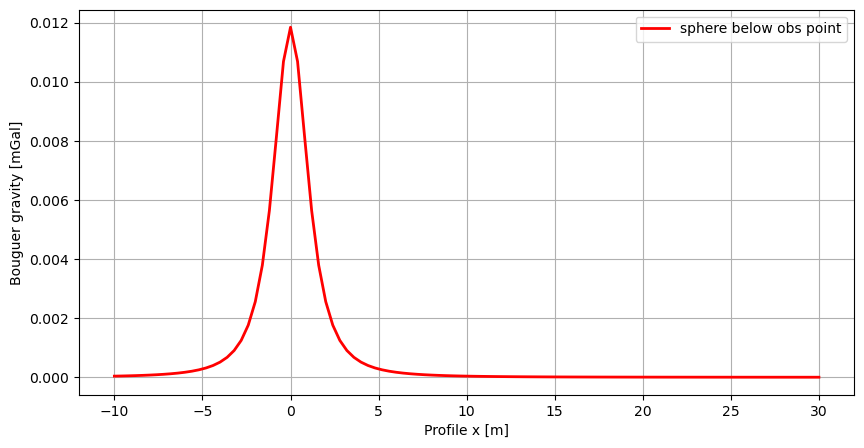

In [3]:
xmin=-10;xmax=30
x = np.linspace(xmin,xmax,101)
boug_sphere = np.array([])

for i in range(len(x)):
    gx,gy,gz = grav_sphere(xo=x[i],yo=0,zo=0,xp=0,yp=0,zp=1.5,radius=1.24,rho=500)
    boug_sphere = np.append(boug_sphere,gz)
    

plt.figure(figsize=(10,5))
plt.xlabel('Profile x [m]')
plt.ylabel('Bouguer gravity [mGal]')
plt.plot(x,boug_sphere,linewidth=2,color='red',label='sphere below obs point')
plt.legend()
plt.grid()

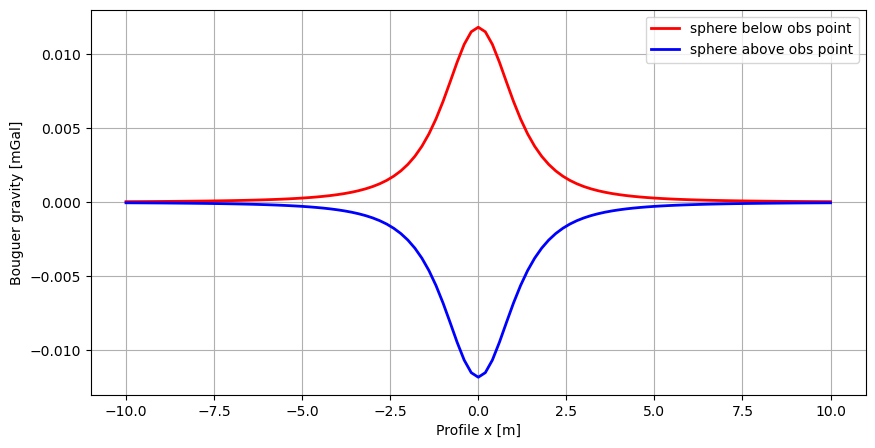

In [4]:
xmin=-10;xmax=10
x = np.linspace(xmin,xmax,101)
boug_sphere_below = np.array([])
boug_sphere_above = np.array([])

for i in range(len(x)):
    gx,gy,gz = grav_sphere(xo=x[i],yo=0,zo=0,xp=0,yp=0,zp=1.5,radius=1.24,rho=500)
    boug_sphere_below = np.append(boug_sphere_below,gz)
    gx,gy,gz = grav_sphere(xo=x[i],yo=0,zo=0,xp=0,yp=0,zp=-1.5,radius=1.24,rho=500)
    boug_sphere_above = np.append(boug_sphere_above,gz)
    

plt.figure(figsize=(10,5))
plt.xlabel('Profile x [m]')
plt.ylabel('Bouguer gravity [mGal]')
plt.plot(x,boug_sphere_below,linewidth=2,color='red',label='sphere below obs point')
plt.plot(x,boug_sphere_above,linewidth=2,color='blue',label='sphere above obs point')
plt.legend()
plt.grid()

----
## 2D map

Next we plan a two-dimensional survey (east,north as coordinates).

We define an anomaly using a sphere with radius $R$ and position $(x_p,y_p,z_p)$ of center of the sphere.

In [8]:
R  = 7.; rho = 500.
xp = 5. # 0.
yp = 0.
zp = 10.

(101, 201) (101, 201)


<IPython.core.display.Javascript object>


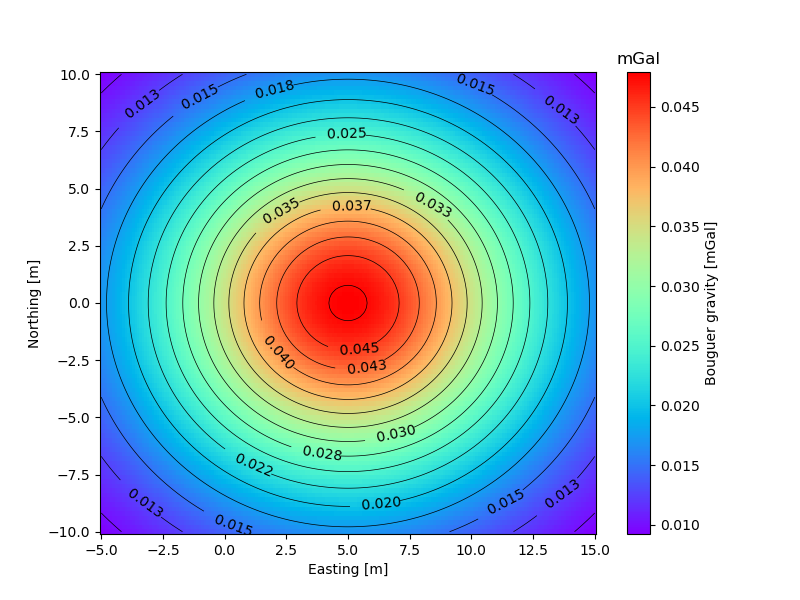

In [9]:
eastmin  = -5;eastmax=15
east     = np.linspace(eastmin,eastmax,201)
northmin = -10;northmax=10
north    = np.linspace(northmin,northmax,101)

EAST,NORTH = np.meshgrid(east,north)
BOUG=0*EAST
print(EAST.shape,NORTH.shape)

for j in range(len(east)):
    for i in range(len(north)):
        #print(i,j,x[i],y[j],xp,yp,zp)
        gx,gy,gz = grav_sphere(xo=east[j],yo=north[i],zo=0,xp=xp,yp=yp,zp=zp,radius=R,rho=rho)
        BOUG[i,j] = gz

#plot figure
fig,axs = plt.subplots(1,1,figsize=(8,6))
# image and contours
axs.set_xlabel('Easting [m]')
axs.set_ylabel('Northing [m]')
im=axs.pcolormesh(EAST,NORTH,BOUG, cmap = plt.get_cmap('rainbow'))
CS=axs.contour(EAST,NORTH,BOUG, 15, linewidths = 0.5, colors = 'k')
plt.clabel(CS, inline=1, fontsize=10,fmt='%8.3f')

# colorbar
cbar=fig.colorbar(im,ax=axs)
cbar.ax.set_title('mGal')
cbar.set_label('Bouguer gravity [mGal]')

<IPython.core.display.Javascript object>


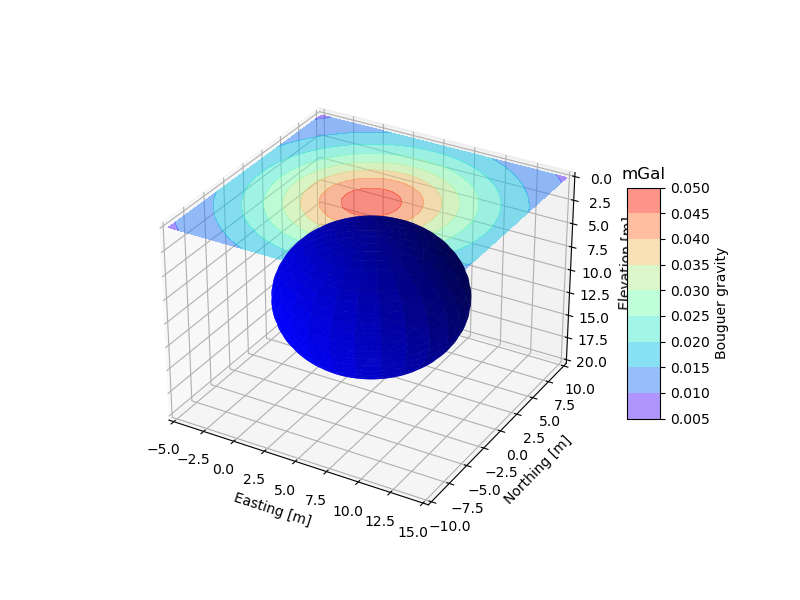

In [7]:
%matplotlib notebook

axs = plt.figure(figsize=(8,6)).add_subplot(projection='3d')
# 3D axes
axs.set_xlim(eastmin,eastmax)
axs.set_ylim(northmin,northmax)
axs.set_zlim((xmax-xmin), 0)
axs.set_xlabel('Easting [m]')
axs.set_ylabel('Northing [m]')
axs.set_zlabel('Elevation [m]')

# Bouguer gravity as 2D plot
surf=axs.contourf(EAST,NORTH,BOUG,zdir='z',offset=0,alpha=0.5,cmap = plt.get_cmap('rainbow'))

# sphere as 3D object
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
xsphere = xp + R * np.outer(np.cos(u), np.sin(v))
ysphere = yp + R * np.outer(np.sin(u), np.sin(v))
zsphere = zp + R * np.outer(np.ones(np.size(u)), np.cos(v))
axs.plot_surface(xsphere,ysphere,zsphere,rstride=4,cstride=4,color='b',linewidth=0,alpha=0.9)

# colorbar
cbar=fig.colorbar(surf, shrink=0.5, aspect=7)
cbar.ax.set_title('mGal')
cbar.set_label('Bouguer gravity')
plt.show()

... done